In [5]:
import time
import numpy as np
import h5py
import matplotlib.pyplot as plt
import scipy
from PIL import Image
from scipy import ndimage
from functions import *

In [6]:
train_x_orig, train_y, test_x_orig, test_y, classes = load_data()

y = 1. It's a cat picture.


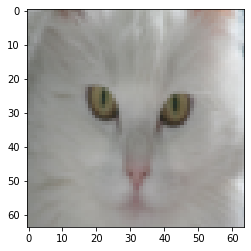

In [8]:
# Example of a picture
index = 50
plt.imshow(train_x_orig[index])
print ("y = " + str(train_y[0,index]) + ". It's a " + classes[train_y[0,index]].decode("utf-8") +  " picture.")

In [10]:
m_train = train_x_orig.shape[0]
num_px = train_x_orig.shape[1]
m_test = test_x_orig.shape[0]

print ("Number of training examples: " + str(m_train))
print ("Number of testing examples: " + str(m_test))
print ("Each image is of size: (" + str(num_px) + ", " + str(num_px) + ", 3)")
print ("train_x_orig shape: " + str(train_x_orig.shape))
print ("train_y shape: " + str(train_y.shape))
print ("test_x_orig shape: " + str(test_x_orig.shape))
print ("test_y shape: " + str(test_y.shape))

Number of training examples: 209
Number of testing examples: 50
Each image is of size: (64, 64, 3)
train_x_orig shape: (209, 64, 64, 3)
train_y shape: (1, 209)
test_x_orig shape: (50, 64, 64, 3)
test_y shape: (1, 50)


In [11]:
# Reshape the training and test examples 
train_x_flatten = train_x_orig.reshape(train_x_orig.shape[0], -1).T   # The "-1" makes reshape flatten the remaining dimensions
test_x_flatten = test_x_orig.reshape(test_x_orig.shape[0], -1).T


In [12]:
# Standardize data to have feature values between 0 and 1.
train_x = train_x_flatten/255.
test_x = test_x_flatten/255.

print ("train_x's shape: " + str(train_x.shape))
print ("test_x's shape: " + str(test_x.shape))

train_x's shape: (12288, 209)
test_x's shape: (12288, 50)


In [13]:
n_x = 12288     
n_h = 7
n_y = 1
layers_dims = (n_x, n_h, n_y)
learning_rate = 0.0075

In [14]:
layers_dims = [12288, 20, 7, 5, 1] #  4-layer model

In [25]:
def L_layer_model(X, Y, layers_dims, learning_rate = 0.0075, num_iterations = 3000, print_cost=False):
    
    costs = []                         # keep track of cost
    
    # Parameters initialization.
    parameters=initialize_parameters_deep(layers_dims)
    
    # Loop (gradient descent)
    for i in range(0, num_iterations):

        # Forward propagation: [LINEAR -> RELU]*(L-1) -> LINEAR -> SIGMOID.
        AL,caches=L_model_forward(X,parameters)
        
        # Compute cost.
        cost=compute_cost(AL,Y)
    
        # Backward propagation.
        grads=L_model_backward(AL,Y,caches)
       
        # Update parameters.
        parameters=update_parameters(parameters, grads, learning_rate)
        
        # Print the cost every 200 iterations
        if print_cost and i % 200 == 0 or i == num_iterations - 1:
            print("Cost after iteration {}: {}".format(i, np.squeeze(cost)))
        if i % 200 == 0 or i == num_iterations:
            costs.append(cost)
    
    return parameters, costs

In [26]:
parameters, costs = L_layer_model(train_x, train_y, layers_dims, num_iterations = 2500, print_cost = True)

Cost after iteration 0: 0.7717493284237686
Cost after iteration 200: 0.6482632048575212
Cost after iteration 400: 0.5670473268366111
Cost after iteration 600: 0.5279299569455267
Cost after iteration 800: 0.36912585249592794
Cost after iteration 1000: 0.31518698886006163
Cost after iteration 1200: 0.23741853400268137
Cost after iteration 1400: 0.18926300388463305
Cost after iteration 1600: 0.14821389662363316
Cost after iteration 1800: 0.1297401754919012
Cost after iteration 2000: 0.11382060668633712
Cost after iteration 2200: 0.10285466069352679
Cost after iteration 2400: 0.09287821526472395
Cost after iteration 2499: 0.088439943441702


In [27]:
pred_train = predict(train_x, train_y, parameters)

Accuracy: 0.9856459330143539


In [28]:
pred_test = predict(test_x, test_y, parameters)

Accuracy: 0.8


Accuracy: 1.0
y = 1.0, your L-layer model predicts a "cat" picture.


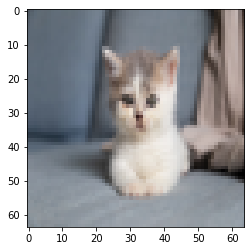

In [30]:
my_image = "kitty.jpg" # change this to the name of your image file 
my_label_y = [1] # the true class of your image (1 -> cat, 0 -> non-cat)

fname = "images/" + my_image
image = np.array(Image.open(fname).resize((num_px, num_px)))
plt.imshow(image)
image = image / 255.
image = image.reshape((1, num_px * num_px * 3)).T

my_predicted_image = predict(image, my_label_y, parameters)


print ("y = " + str(np.squeeze(my_predicted_image)) + ", your L-layer model predicts a \"" + classes[int(np.squeeze(my_predicted_image)),].decode("utf-8") +  "\" picture.")